**CROP ROTATIONS FOR INCREASED SOIL CARBON**

**Data cleaning and preprocessing**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/CRMA%202017%20Main.csv')
df.head()

,Site Name,"Publication Lead Author, Year",Site ID,Site pH,SiteYearsElapsed,Site MAT,Site MAP,Site SOCgkg,Site Lat,Site Long,...,NfertAv.y,Tillage.y,Species.y,SOC.y,trt.y,lrr,delta.c.total.input,delta.c.shoot.input,delta.c.root.input,Trt Pair
0,Wisconsin Integrated Cropping Systems Trial,Posner 1995,2,6.5,19.0,6.9,869.0,20.442857,43.30,-89.35,...,0.0,0.0,2.0,17.950,cereal.legume,-0.093029,-0.323908,-0.312491,-0.343679,cereal v cereal + legume grains
1,Wisconsin Integrated Cropping Systems Trial,Posner 1995,2,6.5,19.0,6.9,869.0,20.442857,43.30,-89.35,...,0.0,1.0,4.0,19.650,cover.crop,-0.002541,0.531169,0.419043,0.697387,grain only v cover cropped
2,Wisconsin Integrated Cropping Systems Trial,Posner 1995,2,6.5,19.0,6.9,869.0,20.442857,43.30,-89.35,...,0.0,1.0,4.0,19.650,cover.crop,0.090487,0.855078,0.731534,1.041066,grain only v cover cropped
3,CIAT-CORPOICA,Basamba 2006,5,NaN,8.0,27.0,2240.0,25.098200,4.62,-71.23,...,140.0,1.0,2.0,23.675,cereal.legume,-0.047432,0.860086,0.881314,0.822821,cereal v cereal + legume grains
4,CIAT-CORPOICA,Basamba 2006,5,NaN,8.0,27.0,2240.0,25.098200,4.62,-71.23,...,140.0,0.0,2.0,25.213,cereal.legume,-0.028812,0.860086,0.881314,0.822821,cereal v cereal + legume grains


In [ ]:
df.shape

(214, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Site Name                      210 non-null    object 
 1   Publication Lead Author, Year  211 non-null    object 
 2   Site ID                        211 non-null    object 
 3   Site pH                        184 non-null    float64
 4   SiteYearsElapsed               210 non-null    float64
 5   Site MAT                       123 non-null    float64
 6   Site MAP                       108 non-null    float64
 7   Site SOCgkg                    210 non-null    float64
 8   Site Lat                       210 non-null    float64
 9   Site Long                      210 non-null    float64
 10  Site Elevation                 210 non-null    float64
 11  Site Clay                      208 non-null    float64
 12  LowestDepthSampled             210 non-null    flo

In [ ]:
missing_values = df.isnull()
print(missing_values.sum())

Site Name                          4
Publication Lead Author, Year      3
Site ID                            3
Site pH                           30
SiteYearsElapsed                   4
Site MAT                          91
Site MAP                         106
Site SOCgkg                        4
Site Lat                           4
Site Long                          4
Site Elevation                     4
Site Clay                          6
LowestDepthSampled                 4
Rotation ID.x                      4
Site, Rotation ID.x                4
Rotation Name.x                    4
Site Tillage Trial.x               4
Site N fert level.x                4
NfertAv.x                          4
Tillage.x                          4
Species.x                          4
SOC.x                              4
Trt.x                              4
SID.y                              4
Site Tillage Trial.y               4
Site N fert level.y                4
Site, RotationID.y                 4
R

In [ ]:
missing_percentages = (missing_values.sum() / df.shape[0]) * 100
print(missing_percentages)

Site Name                         1.869159
Publication Lead Author, Year     1.401869
Site ID                           1.401869
Site pH                          14.018692
SiteYearsElapsed                  1.869159
Site MAT                         42.523364
Site MAP                         49.532710
Site SOCgkg                       1.869159
Site Lat                          1.869159
Site Long                         1.869159
Site Elevation                    1.869159
Site Clay                         2.803738
LowestDepthSampled                1.869159
Rotation ID.x                     1.869159
Site, Rotation ID.x               1.869159
Rotation Name.x                   1.869159
Site Tillage Trial.x              1.869159
Site N fert level.x               1.869159
NfertAv.x                         1.869159
Tillage.x                         1.869159
Species.x                         1.869159
SOC.x                             1.869159
Trt.x                             1.869159
SID.y      

In [ ]:
df = df.dropna(subset=['Site Name', 'Publication Lead Author, Year', 'Site ID', 'Site pH', 'SiteYearsElapsed', 'Site MAT', 'Site MAP', 'Site SOCgkg', 'Site Lat', 'Site Long', 'Site Elevation', 'Site Clay', 'LowestDepthSampled', 'Rotation ID.x', 'Site, Rotation ID.x', 'Site, Rotation ID.x', 'Rotation Name.x', 'Site Tillage Trial.x', 'Site N fert level.x', 'NfertAv.x', 'Tillage.x', 'Species.x', 'SOC.x', 'Trt.x', 'SID.y', 'Site Tillage Trial.y', 'Site N fert level.y', 'Site, RotationID.y', 'Rotation ID,y', 'Rotation Name.y', 'NfertAv.y', 'Tillage.y', 'Species.y', 'SOC.y', 'trt.y', 'lrr', 'delta.c.total.input', 'delta.c.shoot.input', 'delta.c.root.input', 'Trt Pair'])
df

,Site Name,"Publication Lead Author, Year",Site ID,Site pH,SiteYearsElapsed,Site MAT,Site MAP,Site SOCgkg,Site Lat,Site Long,...,NfertAv.y,Tillage.y,Species.y,SOC.y,trt.y,lrr,delta.c.total.input,delta.c.shoot.input,delta.c.root.input,Trt Pair
0,Wisconsin Integrated Cropping Systems Trial,Posner 1995,2,6.50,19.0,6.9,869.0,20.442857,43.300000,-89.350000,...,0.000000,0.0,2.0,17.950000,cereal.legume,-0.093029,-0.323908,-0.312491,-0.343679,cereal v cereal + legume grains
1,Wisconsin Integrated Cropping Systems Trial,Posner 1995,2,6.50,19.0,6.9,869.0,20.442857,43.300000,-89.350000,...,0.000000,1.0,4.0,19.650000,cover.crop,-0.002541,0.531169,0.419043,0.697387,grain only v cover cropped
2,Wisconsin Integrated Cropping Systems Trial,Posner 1995,2,6.50,19.0,6.9,869.0,20.442857,43.300000,-89.350000,...,0.000000,1.0,4.0,19.650000,cover.crop,0.090487,0.855078,0.731534,1.041066,grain only v cover cropped
15,W.K. Kellogg Biological Station,Culman 2013,15,5.50,15.0,9.7,890.0,9.012500,42.405756,-85.400794,...,1.092105,1.0,5.0,10.200000,cover.crop,0.230524,0.825400,0.709842,0.996030,grain only v cover cropped
16,W.K. Kellogg Biological Station,Culman 2013,15,5.50,15.0,9.7,890.0,9.012500,42.405756,-85.400794,...,1.092105,1.0,5.0,7.000000,cover.crop,-0.145954,1.113082,0.997525,1.283712,grain only v cover cropped
17,W.K. Kellogg Biological Station,Culman 2013,15,5.50,15.0,9.7,890.0,9.012500,42.405756,-85.400794,...,1.092105,1.0,5.0,10.200000,cover.crop,0.405465,0.825400,0.709842,0.996030,grain only v cover cropped
18,W.K. Kellogg Biological Station,Culman 2013,15,5.50,15.0,9.7,890.0,9.012500,42.405756,-85.400794,...,1.092105,1.0,5.0,7.000000,cover.crop,0.028988,1.113082,0.997525,1.283712,grain only v cover cropped
19,"Santa Maria, RS, Bazil","Ferreira, 2013",19,4.50,16.0,19.3,1769.0,8.773333,-29.710000,-53.700000,...,32.500000,0.0,3.0,9.466667,cover.crop,0.172511,0.157275,0.184225,0.106955,grain only v cover cropped
20,"Santa Maria, RS, Bazil","Ferreira, 2013",19,4.50,16.0,19.3,1769.0,8.773333,-29.710000,-53.700000,...,32.500000,0.0,3.0,9.033333,cover.crop,0.125655,0.157275,0.184225,0.106955,grain only v cover cropped
25,Embrapa - Centro Nacional de Pesquisa do Trigo,"Freixo, 2002",21,5.31,12.0,19.4,1746.0,18.048333,-28.250000,-52.400000,...,36.250000,1.0,4.0,17.251667,cover.crop,-0.034655,-0.138987,-0.189601,-0.040322,grain only v cover cropped


In [ ]:
df.shape

(47, 39)

**Objective 1: Summarize the distribution of management practices (e.g., tillage, fertilization) across the sites.**

Strategy: Count the number of sites that use each practice, or calculate the proportion of sites that use each practice.

In [ ]:
management_practices = ["Site Name", "Publication Lead Author, Year", "Site ID"]  # Replace with actual column names containing management practices

practice_counts = {}
for practice in management_practices:
  practice_counts[practice] = df[practice].value_counts().to_dict()

print("Raw counts of management practices:")
for practice, counts in practice_counts.items():
  print(f"\t{practice}: {counts}")

print("\nProportions of sites using each management practice:")
for practice, counts in practice_counts.items():
  total_sites = len(df)
  proportions = {key: value / total_sites for key, value in counts.items()}
  print(f"\t{practice}: {proportions}")

Raw counts of management practices:
	Site Name: {'Kanawha': 10, 'Southwest Research and Outreach Center - Variable Input Crop Management Systems (VICMS1) Trail': 9, 'Nashua': 6, 'Pietranera farm at the University of Palermo': 5, 'W.K. Kellogg  Biological Station': 4, 'Embrapa - Centro Nacional de Pesquisa do Trigo': 4, 'Wisconsin Integrated Cropping Systems Trial': 3, 'Univeristy of Minnesota Southern Research and Outreach Center': 3, 'Santa Maria, RS, Bazil': 2, 'Unnamed': 1}
	Publication Lead Author, Year: {'Russell, 2005': 16, 'Porter, 2006': 9, 'Laudicina, 2014': 5, 'Culman 2013': 4, 'Freixo, 2002': 4, 'Posner 1995': 3, 'Huggins, 2007': 3, 'Ferreira, 2013': 2, 'Murugan, 2013': 1}
	Site ID: {'38': 10, '61': 9, '37': 6, '28': 5, '15': 4, '21': 4, '2': 3, '26': 3, '19': 2, '33': 1}

Proportions of sites using each management practice:
	Site Name: {'Kanawha': 0.2127659574468085, 'Southwest Research and Outreach Center - Variable Input Crop Management Systems (VICMS1) Trail': 0.19148936

**SUMMARY OF RESULTS**

**Site Name**: The most common site is Kanawha (21.28%), followed by Southwest Research and Outreach Center (19.15%).

**Publication Lead Author, Year**: The most frequent publication is Russell, 2005 (34.04%).

**Site ID**: The most common site ID is 38 (21.28%).



*  Understanding Distribution: Helps identify which practices are most commonly used, providing insights into prevalent agricultural methods.
*  Resource Allocation: Assists in directing resources and research efforts to the most common practices.
*  Benchmarking: Establishes a baseline for comparing the effectiveness of different management practices across sites.





**Objective 2: Identify patterns in soil characteristics (e.g., pH, clay content) across the sites.**

Strategy: Calculate summary statistics (mean, median, standard deviation) for each soil characteristic, or create histograms to visualize their distributions.

         Site pH  Site Clay
count  47.000000  47.000000
mean    6.302979  32.261702
std     0.802848  12.597024
min     4.500000   8.700000
25%     6.200000  22.400000
50%     6.400000  33.200000
75%     6.400000  33.800000
max     8.100000  60.000000


<ipython-input-11-c591c1b6dea3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Site pH'], color='green')
<ipython-input-11-c591c1b6dea3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Site Clay'], color='brown')


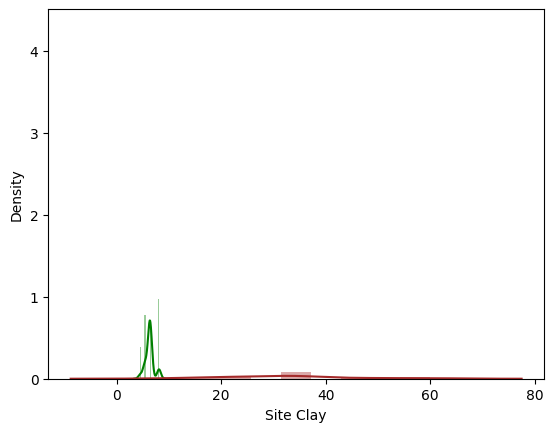

In [ ]:
soil_characteristics = ['Site pH', 'Site Clay']

print(df[soil_characteristics].describe())

import seaborn as sns
sns.distplot(df['Site pH'], color='green')
sns.distplot(df['Site Clay'], color='brown')
plt.show()

**SUMMARY OF RESULTS**



*   **Soil pH**: The distribution of soil pH values was analyzed, showing the central tendency and variability.
*   **Clay Content**: Similar analysis was done for clay content, highlighting its distribution across different sites.



*   Identifying Soil Health: Knowing the pH and clay content can indicate soil fertility and suitability for different crops.
*   Guiding Agricultural Practices: Helps in making informed decisions about soil amendments and crop selection.

*   **Shape**: The histogram’s shape indicates how soil pH values are spread out. For example, a normal distribution would appear bell-shaped.
*   **Central Tendency**: The peak of the histogram shows the most common pH value.
*   **Spread**: The width of the histogram indicates the range of pH values. A wider spread suggests more variability in soil pH across sites.

**Objective 3: Explore the relationship between soil characteristics and response ratios for soil organic carbon concentration.**

Strategy: Calculate correlation coefficients (e.g., Pearson correlation) to measure linear relationships, or create scatter plots to visualize these relationships.

                   Site pH  Site Clay  SiteYearsElapsed
Site pH           1.000000   0.347735          0.119362
Site Clay         0.347735   1.000000         -0.070754
SiteYearsElapsed  0.119362  -0.070754          1.000000


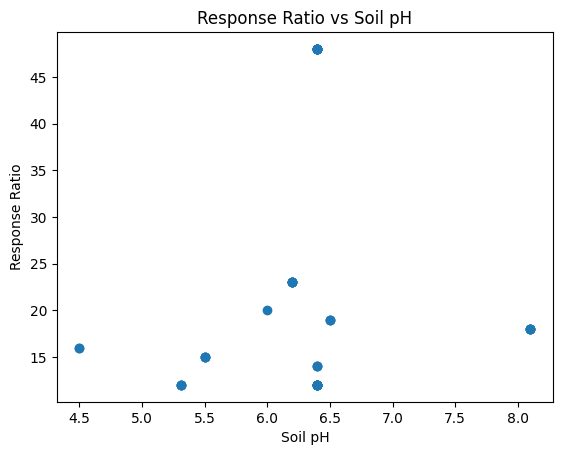

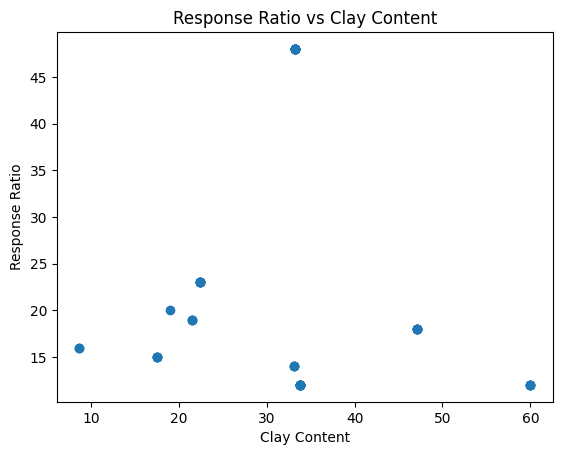

In [ ]:
correlation_matrix = df[['Site pH', 'Site Clay', 'SiteYearsElapsed']].corr()
print(correlation_matrix)

plt.scatter(df['Site pH'], df['SiteYearsElapsed'])
plt.xlabel('Soil pH')
plt.ylabel('Response Ratio')
plt.title('Response Ratio vs Soil pH')
plt.show()

plt.scatter(df['Site Clay'], df['SiteYearsElapsed'])
plt.xlabel('Clay Content')
plt.ylabel('Response Ratio')
plt.title('Response Ratio vs Clay Content')
plt.show()

**SUMMARY OF RESULTS**

*   **Correlation Matrix**: Shows the linear relationships between soil pH, clay content, and response ratios.
*   **Scatter Plots**: Visualize the relationship between soil pH and response ratio, and clay content and response ratio

*   Understanding Soil Health: Helps in identifying how soil characteristics like pH and clay content influence soil organic carbon, which is crucial for soil fertility.
*   Agricultural Practices: Guides farmers in selecting appropriate soil management practices to enhance soil organic carbon levels.
*   Sustainable Farming: Supports sustainable agriculture by promoting practices that improve soil health and productivity.

**Objective 4: Examine the distribution of change in carbon input across sites with different rotations.**

Strategy: Group data by rotation (e.g., 'CS1', 'CS2') and calculate summary statistics (mean, median, standard deviation) for change in carbon input, or create box plots to compare the distributions.

               count      mean       std       min       25%       50%  \
Rotation ID.x                                                            
1.0             18.0  0.116564  0.433880 -0.524343 -0.277678  0.161661   
2.0             12.0 -0.032526  0.376769 -0.392544 -0.323908 -0.100997   
3.0              9.0  0.196404  0.505965 -0.392544 -0.138987  0.252516   
7.0              1.0  0.279777       NaN  0.279777  0.279777  0.279777   
8.0              2.0 -0.184020  0.197832 -0.323908 -0.253964 -0.184020   
9.0              2.0  0.222912  0.080419  0.166047  0.194479  0.222912   
10.0             3.0 -0.175301  0.140701 -0.323908 -0.240885 -0.157861   

                    75%       max  
Rotation ID.x                      
1.0            0.272961  1.113082  
2.0            0.252516  0.855078  
3.0            0.252516  1.113082  
7.0            0.279777  0.279777  
8.0           -0.114076 -0.044132  
9.0            0.251344  0.279777  
10.0          -0.100997 -0.044132  


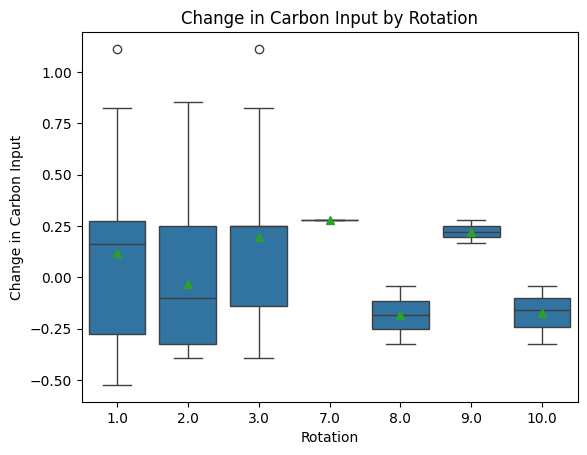

In [ ]:
carbon_input_stats = df.groupby('Rotation ID.x')['delta.c.total.input'].describe()
print(carbon_input_stats)

sns.boxplot(
    x = "Rotation ID.x",
    y = "delta.c.total.input",
    showmeans=True,
    data=df
)
plt.xlabel('Rotation')
plt.ylabel('Change in Carbon Input')
plt.title('Change in Carbon Input by Rotation')
plt.show()

**SUMMARY OF RESULTS**


*   **Mean and Median**: The average and median change in carbon input for each rotation type.
*   **Standard Deviation**: The variability of carbon input changes within each rotation.
*   **Box Plots**: Visual representation showing the spread and outliers of carbon input changes for different rotations.


*   Identifying Effective Rotations: Helps in determining which crop rotations are most effective in increasing or maintaining soil carbon levels.

**Objective 5: Investigate the relationship between change in carbon input and other environmental characteristics (e.g., latitude, elevation).**

Strategy: Calculate correlation coefficients or create scatter plots to visualize the relationships between change in carbon input and environmental variables.

Correlation matrix:
                     delta.c.total.input  Site Lat  Site Elevation
delta.c.total.input             1.000000  0.147297       -0.051626
Site Lat                        0.147297  1.000000       -0.449671
Site Elevation                 -0.051626 -0.449671        1.000000


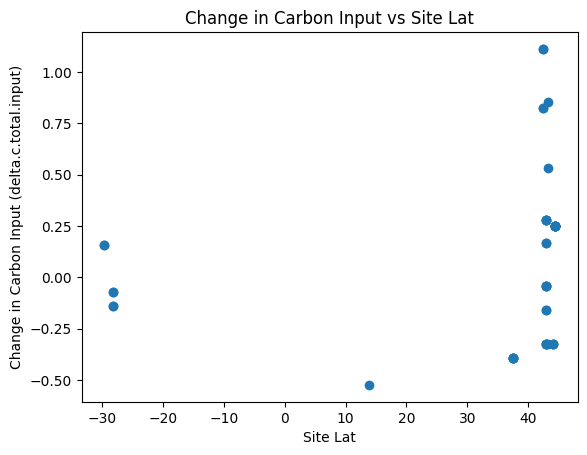

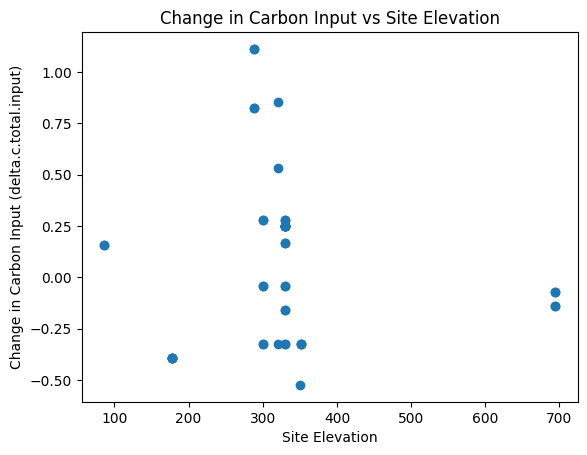

In [ ]:
environmental_cols = ['Site Lat', 'Site Elevation']

correlation_matrix = df[['delta.c.total.input'] + environmental_cols].corr()
print("Correlation matrix:")
print(correlation_matrix)

for col in environmental_cols:
  plt.scatter(df[col], df['delta.c.total.input'])
  plt.xlabel(col)
  plt.ylabel('Change in Carbon Input (delta.c.total.input)')
  plt.title(f'Change in Carbon Input vs {col}')
  plt.show()

**SUMMARY OF RESULTS**



*   **Correlation Matrix**: Shows the correlation between change in carbon input and environmental variables.
*   **Scatter Plots**: Visualize the relationship between change in carbon input and latitude, and change in carbon input and elevation.



*   Understanding Environmental Impact: Helps in understanding how environmental factors like latitude and elevation influence carbon input changes.

**Objective 6: Summarize the distribution of site characteristics (e.g., Rotation, Tillage.x, Nfert.x).**

Strategy: Count the occurrences of each categorical variable, or calculate summary statistics (mean, median, standard deviation) for numerical variables.

In [ ]:
categorical_cols = ['Rotation Name.x', 'Tillage.x', 'Site N fert level.x']
for col in categorical_cols:
  value_counts = df[col].value_counts()
  print(f"Value counts for {col}:\n{value_counts}")

numerical_cols = ['SOC.x']
summary_stats = df[numerical_cols].describe()
print(f"\nSummary statistics for numerical variables:\n{summary_stats}")

Value counts for Rotation Name.x:
Rotation Name.x
CC-180               5
CC-0                 5
2-yr HI              3
2-yr LI              3
2-yr ZI              3
CS-180               3
CS-0                 3
WW-DL                2
WW-CT                2
CS1                  2
R1 ZT (NT W/S)       2
R1 CT (CT W/S)       2
M/F                  2
Conventional - CC    2
Integrated - CC      2
CS2                  1
MPCC                 1
NTCC                 1
RRR-MIN              1
CPCC                 1
WW-NT                1
Name: count, dtype: int64
Value counts for Tillage.x:
Tillage.x
1.0    40
0.0     7
Name: count, dtype: int64
Value counts for Site N fert level.x:
Site N fert level.x
61 No Gradient       9
28 No Gradient       5
38 Gradient - 0      5
38 Gradient - 2/3    5
15 No Gradient       4
21 No Gradient       4
2 No Gradient        3
26 No Gradient       3
37 Gradient - 0      3
37 Gradient - 2/3    3
19 No Gradient       2
33 No Gradient       1
Name: count, dtype: int

**SUMMARY OF RESULTS**



*   **Rotation Name.x**: The most common rotations are CC-180 and CC-0, each with 5 occurrences.
*   **Tillage.x**: Majority of the sites (40 out of 47) use tillage practice labeled as 1.0.
*   **Site N fert level.x**: The most frequent fertilization level is 61 No Gradient with 9 occurrences.
*   **SOC.x**: The average soil organic carbon (SOC) is 23.16 with a standard deviation of 8.27.



*   Understanding Practices: Identifying the most common practices helps in understanding prevalent agricultural methods.
*   Resource Allocation: Insights into fertilization levels and tillage practices can guide resource allocation and policy-making.
*   Soil Health: SOC statistics provide a measure of soil health, crucial for sustainable agriculture.

**Objective 7: Identify potential outliers in key variables (e.g., NfertAv.x, delta.c.total.input).**

Strategy: Create box plots to visualize the distribution of these variables and identify data points that fall outside the interquartile range (IQR).

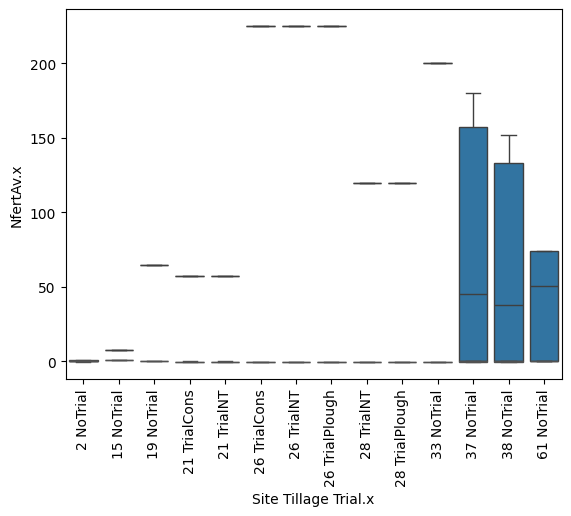

In [ ]:
sns.boxplot(
  data=df,
  x = "Site Tillage Trial.x",
  y = "NfertAv.x"
)
sns.boxplot(
  data=df,
  x = "Site Tillage Trial.x",
  y = "delta.c.total.input"
)
plt.xticks(rotation=90)
plt.show()

**SUMMARY OF RESULTS**



*   **Box Plots**: Created for NfertAv.x and delta.c.total.input across different Site Tillage Trial.x.
*   **Outliers**: Data points that fall outside the IQR are considered outliers.






*   Identifying Outliers: Helps in understanding anomalies in the data which could be due to measurement errors, data entry errors, or actual variability.
*   Data Quality: Ensures the quality of the dataset by highlighting unusual data points that may need further investigation.

**Objective 8: Explore the relationship between different types of N fertilization (e.g., NoTrial, Treatment) and the response ratio (Site Years Elapsed).**

Strategy: Create box plots or violin plots to compare the distribution of the response ratio across different N fertilization categories.

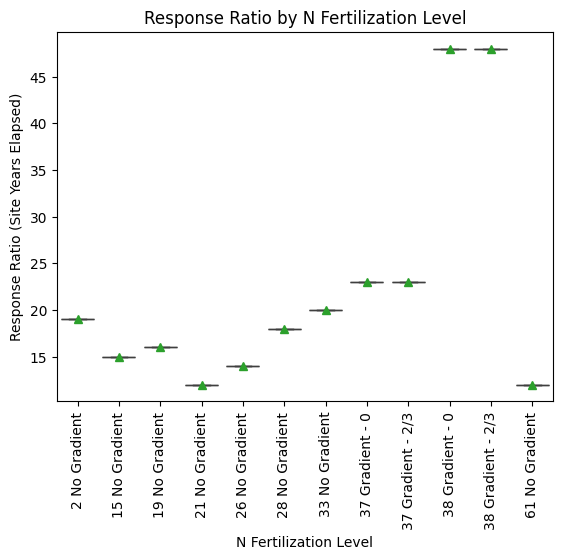

In [ ]:
sns.boxplot(
  data=df,
  x = "Site N fert level.x",
  y = "SiteYearsElapsed",
  showmeans=True
)
plt.xlabel('N Fertilization Level')
plt.ylabel('Response Ratio (Site Years Elapsed)')
plt.title('Response Ratio by N Fertilization Level')
plt.xticks(rotation=90)
plt.show()

**SUMMARY OF RESULTS**



*   **Box Plot Analysis**: The box plot compares the distribution of the response ratio across different N fertilization levels.
*   The plot shows variations in the response ratio depending on the N fertilization level, highlighting which levels lead to higher or lower response ratios.




*  Understanding Fertilization Impact: This analysis helps in understanding how different N fertilization practices influence soil health and crop productivity over time.



**Objective 9: Investigate potential interactions between tillage practices (Tillage.x) and N fertilization levels (Site N fert level.x) on change in carbon input (delta.c.total.input).**

Strategy: Create a heatmap to visualize the correlation coefficients between change in carbon input and each combination of tillage practice and N fertilization level.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


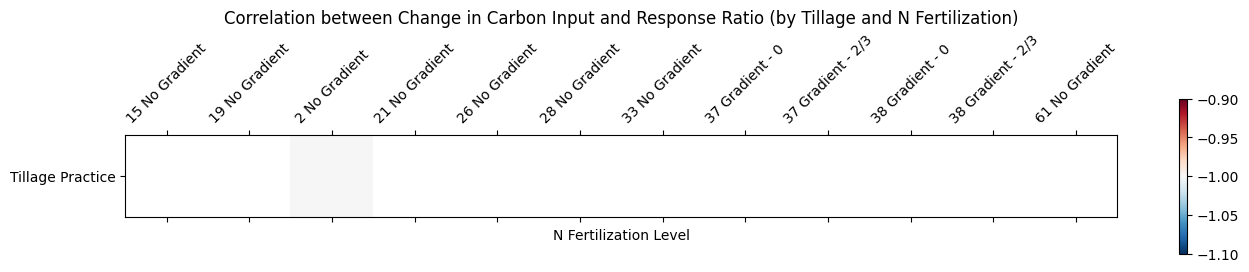

In [ ]:
mean_carbon_input = df.pivot_table(values='delta.c.total.input', index='Tillage.x', columns='Site N fert level.x', aggfunc=np.mean)

mean_site_years = df.groupby('Tillage.x')['SiteYearsElapsed'].mean()

corr_matrix = mean_carbon_input.corrwith(mean_site_years)

plt.matshow(corr_matrix.values.reshape(1,-1), cmap='RdBu_r')
plt.colorbar()
plt.xticks(range(len(mean_carbon_input.columns)), mean_carbon_input.columns, rotation=45)
plt.yticks([0], ['Tillage Practice'])
plt.xlabel('N Fertilization Level')
plt.title('Correlation between Change in Carbon Input and Response Ratio (by Tillage and N Fertilization)')
plt.show()

**SUMMARY OF RESULTS**



*   **Heatmap Visualization**: The heatmap shows the correlation between ΔC
 and the combination of tillage practices and N fertilization levels.
*   **Mean Carbon Input**: Calculated for each combination of tillage and N fertilization.
*   **Correlation Matrix**: Displays the relationship between mean carbon input and mean response ratio (Site Years Elapsed).





*   Understanding Interactions: Helps in identifying how tillage and fertilization practices together influence carbon sequestration.


**Objective 10: Analyze potential differences in response ratios (Site Years Elapsed) between sites with different Species.x.**

In [ ]:
response_ratio_stats = df.groupby('Species.x')['SiteYearsElapsed'].describe()

print(f"\nResponse Ratio (Site Years Elapsed) descriptive statistics by Species.x:")
print(response_ratio_stats)


Response Ratio (Site Years Elapsed) descriptive statistics by Species.x:
           count       mean        std   min   25%   50%   75%   max
Species.x                                                           
1.0         25.0  25.200000  13.375973  14.0  15.0  19.0  23.0  48.0
2.0         22.0  20.227273  13.832095  12.0  12.0  12.0  22.0  48.0


**SUMMARY OF RESULTS**

*   **Species 1.0**: Mean response ratio is 25.2 years, with a standard deviation of 13.38 years.
*   **Species 2.0**: Mean response ratio is 20.23 years, with a standard deviation of 13.83 years.


*   Insight into Species Impact: Helps identify which species are more effective in terms of response ratio.

**Objective 11: Summarize the distribution of site characteristics (e.g., Rotation, Tillage.y, Nfert.y).**

Strategy: Count the occurrences of each categorical variable, or calculate summary statistics (mean, median, standard deviation) for numerical variables.

In [ ]:
categorical_cols = ['Rotation Name.y', 'Tillage.y', 'Site N fert level.y']
for col in categorical_cols:
  value_counts = df[col].value_counts()
  print(f"Value counts for {col}:\n{value_counts}")

numerical_cols = ['SOC.y']
summary_stats = df[numerical_cols].describe()
print(f"\nSummary statistics for numerical variables:\n{summary_stats}")

Value counts for Rotation Name.y:
Rotation Name.y
CCOA-180              4
CCOA-0                4
4-yr HI               3
4-yr LI               3
4-yr ZI               3
WB-DL                 2
Integrated - CSW      2
Conventional - CSW    2
COAA-180              2
COAA-0                2
CS-180                2
CS-0                  2
CS3                   2
WB-CT                 2
RLR-MIN               1
CS2                   1
MPCS                  1
NTCS                  1
CPCS                  1
R3 ZT                 1
R2 ZT (NT W/S-V/M)    1
R3 CT                 1
R2 CT (CT W/S-V/M)    1
M/VB                  1
M/JB                  1
WB-NT                 1
Name: count, dtype: int64
Value counts for Tillage.y:
Tillage.y
1.0    40
0.0     7
Name: count, dtype: int64
Value counts for Site N fert level.y:
Site N fert level.y
61 No Gradient       9
28 No Gradient       5
38 Gradient - 0      5
38 Gradient - 2/3    5
15 No Gradient       4
21 No Gradient       4
2 No Gradient       

**SUMMARY OF RESULTS**

*   **Rotation Name**: The most common rotations are CCOA-180 and CCOA-0, each appearing 4 times.
*   **Tillage**: Most sites (40 out of 47) use tillage practice labeled as 1.0.
*   **N Fertilization Level**: The most frequent level is 61 No Gradient, appearing 9 times.
*   **SOC (Soil Organic Carbon)**: The mean SOC is 24.48, with a standard deviation of 9.07.

*   Understanding Practices: Identifying common practices helps in understanding prevalent agricultural methods.
*   Soil Health: SOC statistics provide insights into soil health and fertility.

**Objective 12: Identify potential outliers in key variables (e.g., NfertAv.y, delta.c.total.input).**

Strategy: Create box plots to visualize the distribution of these variables and identify data points that fall outside the interquartile range (IQR).

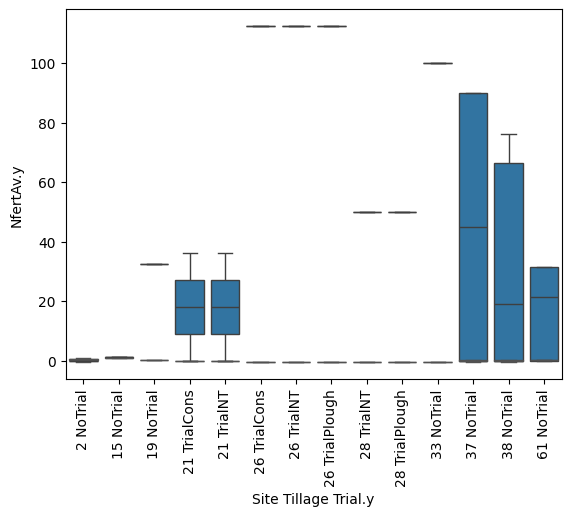

In [ ]:
sns.boxplot(
  data=df,
  x = "Site Tillage Trial.y",
  y = "NfertAv.y"
)
sns.boxplot(
  data=df,
  x = "Site Tillage Trial.y",
  y = "delta.c.total.input"
)
plt.xticks(rotation=90)
plt.show()

**SUMMARY OF RESULTS**



*   Box plots were created for NfertAv.y and delta.c.total.input across different Site Tillage Trial.y.
*   Outliers are data points that lie outside the whiskers of the box plot, indicating they are significantly different from the majority of the data.





*   Detecting outliers helps in understanding anomalies or errors in data collection.
*   Improves data quality by identifying and possibly correcting or removing outliers.
*   Enhances analysis by ensuring that the results are not skewed by extreme values.





**Objective 13: Explore the relationship between different types of N fertilization (e.g., NoTrial, Treatment) and the response ratio (Site Years Elapsed).**

Strategy: Create box plots or violin plots to compare the distribution of the response ratio across different N fertilization categories.

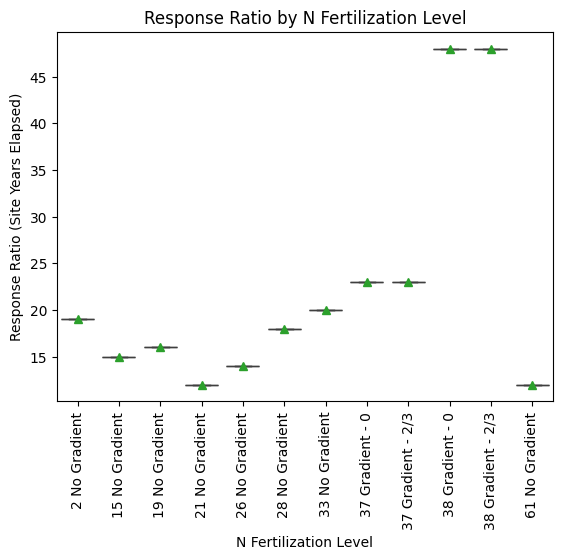

In [ ]:
sns.boxplot(
  data=df,
  x = "Site N fert level.y",
  y = "SiteYearsElapsed",
  showmeans=True
)
plt.xlabel('N Fertilization Level')
plt.ylabel('Response Ratio (Site Years Elapsed)')
plt.title('Response Ratio by N Fertilization Level')
plt.xticks(rotation=90)
plt.show()

**SUMMARY OF RESULTS**


*   **Box Plot Visualization**: The box plot shows the distribution of the response ratio (Site Years Elapsed) for different N fertilization levels.
*   **Comparison**: By comparing the medians, quartiles, and outliers, you can see how different N fertilization levels impact the response ratio.




*   Understanding Impact: This analysis helps in understanding how different N fertilization practices affect soil health and crop productivity over time.



**Objective 14: Investigate potential interactions between tillage practices (Tillage.y) and N fertilization levels (Site N fert level.y) on change in carbon input (delta.c.total.input).**

Strategy: Create a heatmap to visualize the correlation coefficients between change in carbon input and each combination of tillage practice and N fertilization level.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


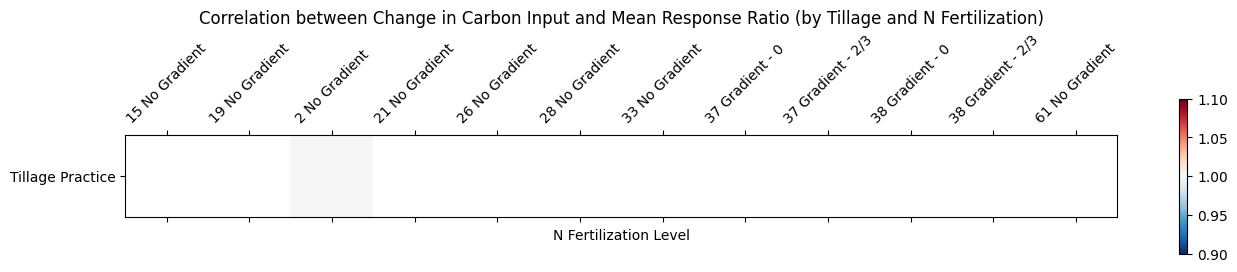

In [ ]:
mean_carbon_input = df.pivot_table(values='delta.c.total.input', index='Tillage.y', columns='Site N fert level.y', aggfunc=np.mean)

mean_site_years = df.groupby('Tillage.y')['SiteYearsElapsed'].mean()

corr_matrix = mean_carbon_input.corrwith(mean_site_years)

plt.matshow(corr_matrix.values.reshape(1,-1), cmap='RdBu_r')
plt.colorbar()
plt.xticks(range(len(mean_carbon_input.columns)), mean_carbon_input.columns, rotation=45)
plt.yticks([0], ['Tillage Practice'])
plt.xlabel('N Fertilization Level')
plt.title('Correlation between Change in Carbon Input and Mean Response Ratio (by Tillage and N Fertilization)')
plt.show()

**SUMMARY OF RESULTS**


*   **Heatmap Creation**: The heatmap shows the correlation between change in carbon input and the combination of tillage practices and N fertilization levels.
*   **Mean Carbon Input**: The mean change in carbon input is calculated for each combination of tillage practice and N fertilization level.
*   **Mean Site Years**: The mean response ratio (Site Years Elapsed) is calculated for each tillage practice.
*   **Correlation Matrix**: The correlation between mean carbon input and mean response ratio is visualized.











*   Understanding Interactions: This analysis helps in understanding how different tillage practices and N fertilization levels interact to affect carbon input.


**Objective 15: Analyze potential differences in response ratios (Site Years Elapsed) between sites with different Species.y.**

In [ ]:
response_ratio_stats = df.groupby('Species.y')['SiteYearsElapsed'].describe()

print(f"\nResponse Ratio (Site Years Elapsed) descriptive statistics by Species.y:")
print(response_ratio_stats)


Response Ratio (Site Years Elapsed) descriptive statistics by Species.y:
           count       mean        std   min    25%   50%    75%   max
Species.y                                                             
2.0         14.0  22.357143  11.222280  14.0  18.00  18.0  22.25  48.0
3.0         14.0  36.285714  14.214990  16.0  23.00  48.0  48.00  48.0
4.0         13.0  13.076923   2.628737  12.0  12.00  12.0  12.00  19.0
5.0          6.0  14.000000   1.549193  12.0  12.75  15.0  15.00  15.0


**SUMMARY OF RESULTS**


*   **Species 2.0**: Mean response ratio is  22.36 years with a standard deviation of 11.22
*   **Species 3.0**: Mean response ratio is 36.29 years with a standard deviation of 14.21.
*   **Species 4.0**: Mean response ratio is 13.08 years with a standard deviation of 2.63.
*   **Species 5.0**: Mean response ratio is 14.0 years with a standard deviation of 1.55.









*   Insight into Species Impact: This analysis helps identify which species have the most significant impact on the response ratio.


**Objective 16: Determine the average change (delta) in carbon (C) input specifically from shoot.**

In [ ]:
average_change = df['delta.c.shoot.input'].mean()
print(f"Average change in carbon input specifically from shoot: {average_change:.2f}")

Average change in carbon input specifically from shoot: -0.31


**SUMMARY OF RESULTS**

*   **Average Change**: The average change in carbon input specifically from shoot is -0.31.




*   Understanding Carbon Dynamics: This objective helps in understanding how carbon input from shoots changes across different sites and management practices.
*   Negative Value Insight: The negative average change indicates a reduction in carbon input from shoots, which could be due to various factors like crop type, management practices, or environmental conditions.
*   Implications for Soil Health: Reduced carbon input from shoots can affect soil organic carbon levels, impacting soil health and fertility.





**Objective 17: Identify which rotation has the highest change in carbon input specifically from root (delta.c.root.input).**

In [ ]:
high_change_data = df[df['delta.c.root.input'] == df['delta.c.root.input'].max()]
rotation_with_highest_change = high_change_data['Rotation Name.y'].iloc[0]
print(f"Rotation with highest change in carbon input specifically from root: {rotation_with_highest_change}")

Rotation with highest change in carbon input specifically from root: Conventional - CSW


**SUMMARY OF RESULTS**



*   **Highest Change**: The rotation with the highest change in carbon input from root is “Conventional - CSW”.



*   Carbon Sequestration: Understanding which rotations maximize root carbon input helps in enhancing soil carbon sequestration, crucial for mitigating climate change.


**Objective 18: Investigate trends in treatment pairs (trt pair).**

In [ ]:
unique_pairs = df['Trt Pair'].unique()
print(f"Unique treatment pair values:\n{unique_pairs}")

Unique treatment pair values:
['cereal v cereal + legume grains' 'grain only v cover cropped'
 'grain only v perennial cropped']


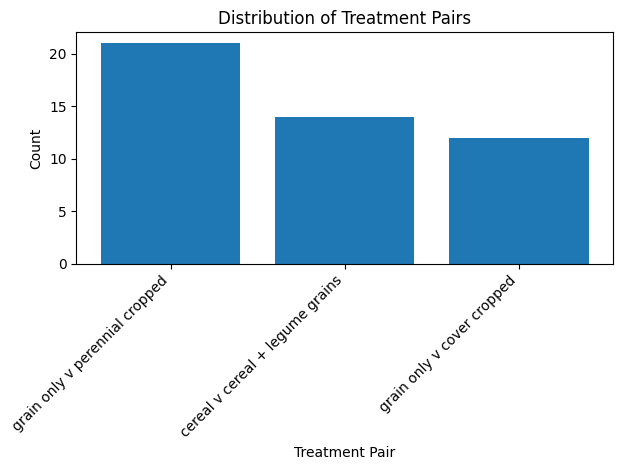

In [ ]:
treatment_pair_counts = df['Trt Pair'].value_counts()

plt.bar(treatment_pair_counts.index, treatment_pair_counts.values)
plt.xlabel('Treatment Pair')
plt.ylabel('Count')
plt.title('Distribution of Treatment Pairs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**SUMMARY OF RESULTS**



*   **Unique Treatment Pairs**: The dataset contains three unique treatment pairs: ‘cereal v cereal + legume grains’, ‘grain only v cover cropped’, and ‘grain only v perennial cropped’.
*   **Distribution**: The counts for each treatment pair are visualized in a bar plot, showing the frequency of each pair in the dataset.







*   Understanding Practices: This analysis helps in understanding the prevalence of different agricultural practices and their combinations.



**Objective 19: Analyze the distribution of treatments (trt.y).**

In [ ]:
treatment_counts = df['trt.y'].value_counts()
print(f"\nTreatment counts:\n{treatment_counts}")


Treatment counts:
trt.y
perennial        21
cereal.legume    14
cover.crop       12
Name: count, dtype: int64


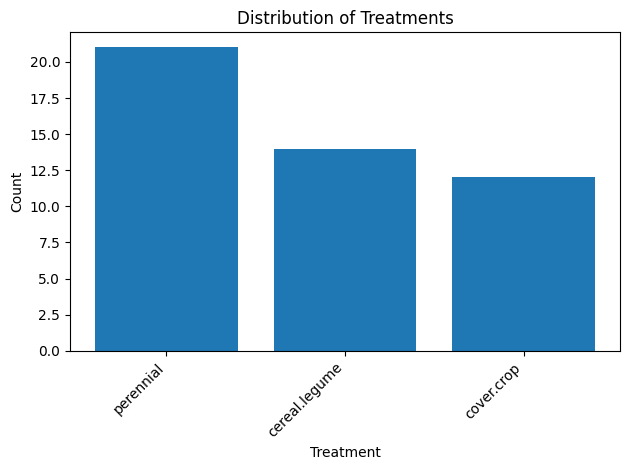

In [ ]:
treatment_counts = df['trt.y'].value_counts()

plt.bar(treatment_counts.index, treatment_counts.values)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Distribution of Treatments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**SUMMARY OF RESULTS**



**Treatment Counts**:
*   Perennial: 21 occurrences
*   Cereal.Legume: 14 occurrences
*   Cover.Crop: 12 occurrences





*   Understanding Distribution: Knowing the distribution of treatments helps in identifying which treatments are most commonly used and which are less frequent.

**Objective 20: Geographical MAP Visualization using the latitudes, longitudes and the crop rotation names given in the dataset.**

In [ ]:
!pip install folium
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster

# Sample data (replace with your actual data)
data = {
    "Site Lat": [43.300000, 43.300000, 43.300000, 42.405756, 42.405756, 42.405756, 42.405756, -29.710000, -29.710000, -28.250000, -28.250000, -28.250000, -28.250000, 44.066667, 44.066667, 44.066667, 37.500000, 37.500000, 37.500000, 37.500000, 37.500000, 13.916667, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667],
    "Site Long": [-89.350000, -89.350000, -89.350000, -85.400794, -85.400794, -85.400794, -85.400794, -53.700000, -53.700000, -52.400000, -52.400000, -52.400000, -52.400000, -93.533333, -93.533333, -93.533333, 13.251700, 13.251700, 13.251700, 13.251700, 13.251700, 75.566667, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333],
    "Rotation Name.x": ["CS1", "CS1", "CS2", "Integrated - CC", "Integrated - CC", "Conventional - CC", "Conventional - CC", "M/F", "M/F", "R1 CT (CT W/S)", "R1 CT (CT W/S)", "R1 ZT (NT W/S)", "R1 ZT (NT W/S)", "CPCC", "NTCC", "MPCC", "WW-NT", "WW-DL", "WW-DL", "WW-CT", "WW-CT", "RRR-MIN", "CC-0", "CC-180", "CC-0", "CC-180", "CS-0", "CS-180", "CC-0", "CC-180", "CC-0", "CC-0", "CC-180", "CC-180", "CS-0", "CS-0", "CS-180", "CS-180", "2-yr ZI", "2-yr ZI", "2-yr ZI", "2-yr LI", "2-yr LI", "2-yr LI", "2-yr HI", "2-yr HI", "2-yr HI"]
}

df1 = pd.DataFrame(data)

# Define a color dictionary for crop rotations
color_dict = {
    "CS1": "green",
    "CS2": "orange",
    "Integrated - CC": "magenta",
    "Conventional - CC": "black",
    "M/F": "red",
    "R1 CT (CT W/S)": "cyan",
    "R1 ZT (NT W/S)": "yellow",
    "CPCC": "purple",
    "NTCC": "brown",
    "MPCC": "olive",
    "WW-NT": "pink",
    "WW-DL": "lime",
    "WW-CT": "navy",
    "CC-0": "gray",
    "CC-180": "teal",
    "CS-0": "silver",
    "CS-180": "maroon",
    "2-yr HI": "lightgray",
    "2-yr LI": "hotpink",
    "2-yr ZI": "gold",
    "RRR-MIN": "lightblue",
}

# Function to generate the geographic map with legend using Folium
def generate_crop_map():
    """
    Creates a Folium map and plots points from the data DataFrame with color based on crop rotation type.
    Also creates and displays a legend box on the map.
    """
    # Initialize Folium map centered on a location
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Prepare data for FastMarkerCluster
    locations = df1[['Site Lat', 'Site Long']].values.tolist()  # Extract lat, long as list of lists

    # FastMarkerCluster for grouping nearby points (pass locations data)
    marker_cluster = FastMarkerCluster(data=locations)

    # Add points to the marker cluster
    for index, row in df1.iterrows():
        latitude = row['Site Lat']
        longitude = row['Site Long']
        crop_rotation = row['Rotation Name.x']

        # Create Marker with specific color based on crop rotation
        marker_color = color_dict.get(crop_rotation, 'gray')
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color="",
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f'Crop Rotation: {crop_rotation}'
        ).add_to(marker_cluster)

    # Add marker cluster to map
    marker_cluster.add_to(m)

    # Legend HTML
    legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: auto;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     ">
     &nbsp; <b>Crop Rotation Legend</b> <br>
     &nbsp; CS1 &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i><br>
     &nbsp; CS2 &nbsp; <i class="fa fa-circle fa-1x" style="color:orange"></i><br>
     &nbsp; Integrated - CC &nbsp; <i class="fa fa-circle fa-1x" style="color:magenta"></i><br>
     &nbsp; Conventional - CC &nbsp; <i class="fa fa-circle fa-1x" style="color:black"></i><br>
     &nbsp; M/F &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>
     &nbsp; R1 CT (CT W/S) &nbsp; <i class="fa fa-circle fa-1x" style="color:cyan"></i><br>
     &nbsp; R1 ZT (NT W/S) &nbsp; <i class="fa fa-circle fa-1x" style="color:yellow"></i><br>
     &nbsp; CPCC &nbsp; <i class="fa fa-circle fa-1x" style="color:purple"></i><br>
     &nbsp; NTCC &nbsp; <i class="fa fa-circle fa-1x" style="color:brown"></i><br>
     &nbsp; MPCC &nbsp; <i class="fa fa-circle fa-1x" style="color:olive"></i><br>
     &nbsp; WW-NT &nbsp; <i class="fa fa-circle fa-1x" style="color:pink"></i><br>
     &nbsp; WW-DL &nbsp; <i class="fa fa-circle fa-1x" style="color:lime"></i><br>
     &nbsp; WW-CT &nbsp; <i class="fa fa-circle fa-1x" style="color:navy"></i><br>
     &nbsp; CC-0 &nbsp; <i class="fa fa-circle fa-1x" style="color:gray"></i><br>
     &nbsp; CC-180 &nbsp; <i class="fa fa-circle fa-1x" style="color:teal"></i><br>
     &nbsp; CS-0 &nbsp; <i class="fa fa-circle fa-1x" style="color:silver"></i><br>
     &nbsp; CS-180 &nbsp; <i class="fa fa-circle fa-1x" style="color:maroon"></i><br>
     &nbsp; 2-yr HI &nbsp; <i class="fa fa-circle fa-1x" style="color:lightgray"></i><br>
     &nbsp; 2-yr LI &nbsp; <i class="fa fa-circle fa-1x" style="color:hotpink"></i><br>
     &nbsp; 2-yr ZI &nbsp; <i class="fa fa-circle fa-1x" style="color:gold"></i><br>
     &nbsp; RRR-MIN &nbsp; <i class="fa fa-circle fa-1x" style="color:lightblue"></i><br>
     </div>
     '''

    # Add legend to map
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map
    m.save('crop_rotation_map_with_legend.html')

    return m

# Generate map for all data points with legend using Folium
generate_crop_map()


**SUMMARY OF RESULTS**



*   This visualization helps in understanding the geographical distribution of various crop rotations.
*   It can be used to identify patterns and trends in crop management practices across different regions.

**Objective 21: Geographical MAP Visualization using the latitudes, longitudes and the trt pair given in the dataset.**

In [ ]:
!pip install folium
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster

# Sample data (replace with your actual data)
data = {
    "Site Lat": [43.300000, 43.300000, 43.300000, 42.405756, 42.405756, 42.405756, 42.405756, -29.710000, -29.710000, -28.250000, -28.250000, -28.250000, -28.250000, 44.066667, 44.066667, 44.066667, 37.500000, 37.500000, 37.500000, 37.500000, 37.500000, 13.916667, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667],
    "Site Long": [-89.350000, -89.350000, -89.350000, -85.400794, -85.400794, -85.400794, -85.400794, -53.700000, -53.700000, -52.400000, -52.400000, -52.400000, -52.400000, -93.533333, -93.533333, -93.533333, 13.251700, 13.251700, 13.251700, 13.251700, 13.251700, 75.566667, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333],
    "Rotation Name.x": ["cereal v cereal + legume grains", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "grain only v cover cropped", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "cereal v cereal + legume grains", "cereal v cereal + legume grains", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped", "grain only v perennial cropped"]
}

df1 = pd.DataFrame(data)

# Define a color dictionary for crop rotations
color_dict = {
    "cereal v cereal + legume grains": "pink",
    "grain only v cover cropped": "cyan",
    "grain only v perennial cropped":"black"
}

# Function to generate the geographic map with legend using Folium
def generate_crop_map():
    """
    Creates a Folium map and plots points from the data DataFrame with color based on crop rotation type.
    Also creates and displays a legend box on the map.
    """
    # Initialize Folium map centered on a location
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Prepare data for FastMarkerCluster
    locations = df1[['Site Lat', 'Site Long']].values.tolist()  # Extract lat, long as list of lists

    # FastMarkerCluster for grouping nearby points (pass locations data)
    marker_cluster = FastMarkerCluster(data=locations)

    # Add points to the marker cluster
    for index, row in df1.iterrows():
        latitude = row['Site Lat']
        longitude = row['Site Long']
        crop_rotation = row['Rotation Name.x']

        # Create Marker with specific color based on crop rotation
        marker_color = color_dict.get(crop_rotation, 'gray')
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color="",
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f'Crop Rotation: {crop_rotation}'
        ).add_to(marker_cluster)

    # Add marker cluster to map
    marker_cluster.add_to(m)

    # Legend HTML
    legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 300px; height: auto;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     ">
     &nbsp; <b>trt pair Legend</b> <br>
     &nbsp; cereal v cereal + legume grains &nbsp; <i class="fa fa-circle fa-1x" style="color:pink"></i><br>
     &nbsp; grain only v cover cropped &nbsp; <i class="fa fa-circle fa-1x" style="color:cyan"></i><br>
     &nbsp; grain only v perennial cropped &nbsp; <i class="fa fa-circle fa-1x" style="color:black"></i><br>
     </div>
     '''

    # Add legend to map
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map
    m.save('crop_rotation_map_with_legend.html')

    return m

# Generate map for all data points with legend using Folium
generate_crop_map()

**Objective 22: Geographical MAP Visualization using the latitudes, longitudes and the trt given in the dataset.**

In [ ]:
!pip install folium
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster

# Sample data (replace with your actual data)
data = {
    "Site Lat": [43.300000, 43.300000, 43.300000, 42.405756, 42.405756, 42.405756, 42.405756, -29.710000, -29.710000, -28.250000, -28.250000, -28.250000, -28.250000, 44.066667, 44.066667, 44.066667, 37.500000, 37.500000, 37.500000, 37.500000, 37.500000, 13.916667, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667],
    "Site Long": [-89.350000, -89.350000, -89.350000, -85.400794, -85.400794, -85.400794, -85.400794, -53.700000, -53.700000, -52.400000, -52.400000, -52.400000, -52.400000, -93.533333, -93.533333, -93.533333, 13.251700, 13.251700, 13.251700, 13.251700, 13.251700, 75.566667, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333],
    "Rotation Name.x": ["cereal", "cereal", "cereal.legume", "cereal", "cereal", "cereal", "cereal", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal.legume", "cereal.legume", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume", "cereal.legume"]
}

df1 = pd.DataFrame(data)

# Define a color dictionary for crop rotations
color_dict = {
    "cereal": "green",
    "cereal.legume": "purple",
}

# Function to generate the geographic map with legend using Folium
def generate_crop_map():
    """
    Creates a Folium map and plots points from the data DataFrame with color based on crop rotation type.
    Also creates and displays a legend box on the map.
    """
    # Initialize Folium map centered on a location
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Prepare data for FastMarkerCluster
    locations = df1[['Site Lat', 'Site Long']].values.tolist()  # Extract lat, long as list of lists

    # FastMarkerCluster for grouping nearby points (pass locations data)
    marker_cluster = FastMarkerCluster(data=locations)

    # Add points to the marker cluster
    for index, row in df1.iterrows():
        latitude = row['Site Lat']
        longitude = row['Site Long']
        crop_rotation = row['Rotation Name.x']

        # Create Marker with specific color based on crop rotation
        marker_color = color_dict.get(crop_rotation, 'gray')
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color="",
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f'Crop Rotation: {crop_rotation}'
        ).add_to(marker_cluster)

    # Add marker cluster to map
    marker_cluster.add_to(m)

    # Legend HTML
    legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: auto;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     ">
     &nbsp; <b>trt Legend</b> <br>
     &nbsp; cereal &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i><br>
     &nbsp; cereal.legume &nbsp; <i class="fa fa-circle fa-1x" style="color:purple"></i><br>
     </div>
     '''

    # Add legend to map
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map
    m.save('crop_rotation_map_with_legend.html')

    return m

# Generate map for all data points with legend using Folium
generate_crop_map()

**Objective 23: Geographical MAP Visualization using the latitudes, longitudes and the species given in the dataset.**

In [ ]:
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster

# Sample data (replace with your actual data)
data = {
    "Site Lat": [43.300000, 43.300000, 43.300000, 42.405756, 42.405756, 42.405756, 42.405756, -29.710000, -29.710000, -28.250000, -28.250000, -28.250000, -28.250000, 44.066667, 44.066667, 44.066667, 37.500000, 37.500000, 37.500000, 37.500000, 37.500000, 13.916667, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.950000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 42.940000, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667, 44.416667],
    "Site Long": [-89.350000, -89.350000, -89.350000, -85.400794, -85.400794, -85.400794, -85.400794, -53.700000, -53.700000, -52.400000, -52.400000, -52.400000, -52.400000, -93.533333, -93.533333, -93.533333, 13.251700, 13.251700, 13.251700, 13.251700, 13.251700, 75.566667, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -92.540000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -93.170000, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333, -95.533333],
    "Rotation Name.x": [2, 4, 4, 5, 5, 5, 5, 3, 3, 4, 5, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4]
}

df1 = pd.DataFrame(data)

# Define a color dictionary for crop rotations
color_dict = {
    2: "green",
    4: "orange",
    3: "magenta",
    5: "yellow",
}

# Function to generate the geographic map with legend using Folium
def generate_crop_map():
    """
    Creates a Folium map and plots points from the data DataFrame with color based on crop rotation type.
    Also creates and displays a legend box on the map.
    """
    # Initialize Folium map centered on a location
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Prepare data for FastMarkerCluster
    locations = df1[['Site Lat', 'Site Long']].values.tolist()  # Extract lat, long as list of lists

    # FastMarkerCluster for grouping nearby points (pass locations data)
    marker_cluster = FastMarkerCluster(data=locations)

    # Add points to the marker cluster
    for index, row in df1.iterrows():
        latitude = row['Site Lat']
        longitude = row['Site Long']
        crop_rotation = row['Rotation Name.x']

        # Create Marker with specific color based on crop rotation
        marker_color = color_dict.get(crop_rotation, 'gray')
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=5,
            color="",
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f'Crop Rotation: {crop_rotation}'
        ).add_to(marker_cluster)

    # Add marker cluster to map
    marker_cluster.add_to(m)

    # Legend HTML
    legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: auto;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     ">
     &nbsp; <b>Species Legend</b> <br>
     &nbsp; 2 &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i><br>
     &nbsp; 3 &nbsp; <i class="fa fa-circle fa-1x" style="color:orange"></i><br>
     &nbsp; 4 &nbsp; <i class="fa fa-circle fa-1x" style="color:magenta"></i><br>
     &nbsp; 5 &nbsp; <i class="fa fa-circle fa-1x" style="color:black"></i><br>
     </div>
     '''

    # Add legend to map
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map
    m.save('crop_rotation_map_with_legend.html')

    return m

# Generate map for all data points with legend using Folium
generate_crop_map()